In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
data = pd.read_csv("TimeSeries.csv")

In [3]:
data

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


C:\Users\cspde\AppData\Local\Temp\ipykernel_3268\4265931963.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('TimeSeries.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
C:\Users\cspde\AppData\Local\Temp\ipykernel_3268\4265931963.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime('190'+x, '%Y-%m')


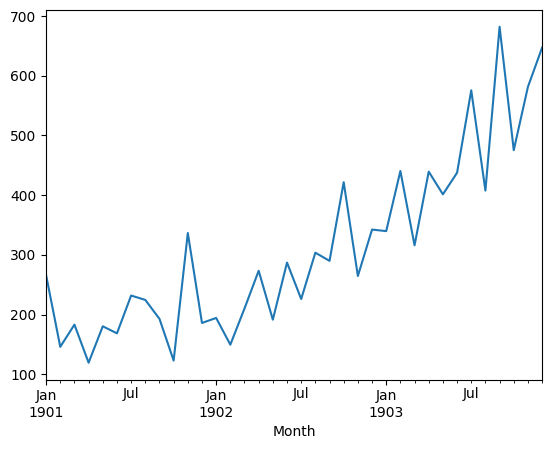

In [4]:
def parser(x):
 return pd.datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('TimeSeries.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# summarize first few rows
print(series.head())
# line plot
series.plot()
plt.show()

In [5]:
def funcA(n):
    def funcB(p):
        return n*p
    return funcB
a = funcA(4)
print(a(6))

24


In [6]:
X = series.values
train, test = X[0:-12], X[-12:]

In [13]:
history = [x for x in train]
predictions = list()

RMSE: 136.761


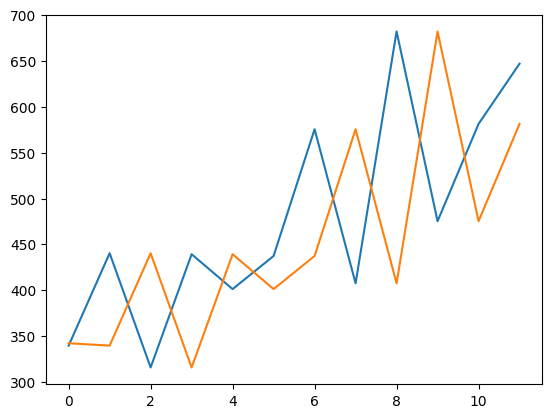

In [14]:
for i in range(len(test)):
 # make prediction
 predictions.append(history[-1])
 # observation
 history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# line plot of observed vs predicted
plt.plot(test)
plt.plot(predictions)
plt.show()

In [11]:
print(len(test))

12


In [12]:
print(len(predictions))

36


In [16]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
 
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
 df = DataFrame(data)
 columns = [df.shift(i) for i in range(1, lag+1)]
 columns.append(df)
 df = concat(columns, axis=1)
 df.fillna(0, inplace=True)
 return df
 
# load dataset
def parser(x):
 return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('TimeSeries.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# transform to supervised learning
X = series.values
supervised = timeseries_to_supervised(X, 1)
print(supervised.head())

       0      0
0    0.0  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3


C:\Users\cspde\AppData\Local\Temp\ipykernel_3268\2024204513.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\cspde\AppData\Local\Temp\ipykernel_3268\2024204513.py:18: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('TimeSeries.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


In [19]:
from pandas import read_csv
from pandas import datetime
from pandas import Series
 
# create a differenced series
def difference(dataset, interval=1):
 diff = list()
 for i in range(interval, len(dataset)):
     value = dataset[i] - dataset[i - interval]
     diff.append(value)
 return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
 return yhat + history[-interval]
 
# load dataset
def parser(x):
 return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('TimeSeries.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
# transform to be stationary
differenced = difference(series, 1)
print(differenced.head())
# invert transform
inverted = list()
for i in range(len(differenced)):
 value = inverse_difference(series, differenced[i], len(series)-i)
 inverted.append(value)
inverted = Series(inverted)
print(inverted.head())

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64
0   -120.1
1     37.2
2    -63.8
3     61.0
4    -11.8
dtype: float64
0    145.9
1    183.1
2    119.3
3    180.3
4    168.5
dtype: float64


C:\Users\cspde\AppData\Local\Temp\ipykernel_3268\2312917534.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\cspde\AppData\Local\Temp\ipykernel_3268\2312917534.py:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('TimeSeries.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


In [20]:
from pandas import read_csv
from pandas import datetime
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('TimeSeries.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
# transform scale
X = series.values
X = X.reshape(len(X), 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X)
scaled_X = scaler.transform(X)
scaled_series = Series(scaled_X[:, 0])
print(scaled_series.head())
# invert transform
inverted_X = scaler.inverse_transform(scaled_X)
inverted_series = Series(inverted_X[:, 0])
print(inverted_series.head())

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64
0   -0.478585
1   -0.905456
2   -0.773236
3   -1.000000
4   -0.783188
dtype: float64
0    266.0
1    145.9
2    183.1
3    119.3
4    180.3
dtype: float64


C:\Users\cspde\AppData\Local\Temp\ipykernel_3268\2944476105.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\cspde\AppData\Local\Temp\ipykernel_3268\2944476105.py:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('TimeSeries.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


In [21]:
https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/

SyntaxError: invalid syntax (2189281063.py, line 1)